# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [1]:
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.manifold import TSNE
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [3]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

model = SVR()
model.fit(X_train,y_train)

print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.21772837063748762
평가 데이터 점수: 0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [4]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

model = SVC()
model.fit(X_train,y_train)

print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

In [5]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train,y_train)

print("Linear SVR 학습 데이터 점수: {}".format(linear_svr.score(X_train,y_train)))
print("Linear SVR 평가 데이터 점수: {}".format(linear_svr.score(X_test,y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train,y_train)

print("학습 데이터 점수: {}".format(polynomial_svr.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(polynomial_svr.score(X_test,y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)

print("학습 데이터 점수: {}".format(rbf_svr.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(rbf_svr.score(X_test,y_test)))

Linear SVR 학습 데이터 점수: 0.7155066205123104
Linear SVR 평가 데이터 점수: 0.6380398541381507
학습 데이터 점수: 0.2024454261446289
평가 데이터 점수: 0.133668450367462
학습 데이터 점수: 0.21772837063748762
평가 데이터 점수: 0.13544178468518187


In [6]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train,y_train)

print("Linear SVC 학습 데이터 점수: {}".format(linear_svc.score(X_train,y_train)))
print("Linear SVC 평가 데이터 점수: {}".format(linear_svc.score(X_test,y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train,y_train)

print("학습 데이터 점수: {}".format(polynomial_svc.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(polynomial_svc.score(X_test,y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)

print("학습 데이터 점수: {}".format(rbf_svc.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(rbf_svc.score(X_test,y_test)))

Linear SVC 학습 데이터 점수: 0.960093896713615
Linear SVC 평가 데이터 점수: 0.986013986013986
학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231
학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [7]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

In [8]:
polynomial_svc = SVC(kernel='poly', degree=2,C=0.1,gamma='auto')
polynomial_svc.fit(X_train,y_train)

print('kernel=poly, degree={}, C={}, gamma={}'.format(2,0.1,'auto'))
print("학습 데이터 점수: {}".format(polynomial_svc.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(polynomial_svc.score(X_test,y_test)))

kernel=poly, degree=2, C=0.1, gamma=auto
학습 데이터 점수: 0.9835680751173709
평가 데이터 점수: 0.993006993006993


In [9]:
rbf_svc = SVC(kernel='rbf', C = 2.0, gamma='scale')
rbf_svc.fit(X_train,y_train)

print('kernel=rbf, C={}, gamma={}'.format(2,0.1,'scale'))
print("학습 데이터 점수: {}".format(rbf_svc.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(rbf_svc.score(X_test,y_test)))

kernel=rbf, C=2, gamma=0.1
학습 데이터 점수: 0.9154929577464789
평가 데이터 점수: 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [10]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

In [11]:
model = SVC()
model.fit(X_train,y_train)

print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
model = SVC()
model.fit(X_train,y_train)

print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9835680751173709
평가 데이터 점수: 0.986013986013986


In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
model = SVC()
model.fit(X_train,y_train)

print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9812206572769953
평가 데이터 점수: 0.9300699300699301


## Linear SVR

### 보스턴 주택 가격

In [16]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
model = SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [19]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.6921263595008127
평가 데이터 점수: 0.7262637543965029


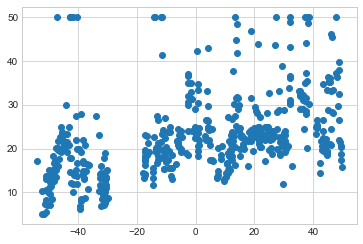

In [20]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

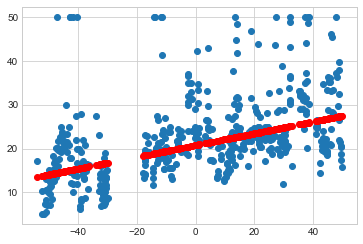

In [21]:
model.fit(X_comp,y)
predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

In [22]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator=estimator,X=X,y=y,cv=5,n_jobs=-1,verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


{'fit_time': array([0.01202202, 0.01894903, 0.01298928, 0.01199174, 0.01498294]),
 'score_time': array([0.00198627, 0.00398946, 0.00299287, 0.0020256 , 0.00202346]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [24]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0,0.1,0.01],
              'model__epsilon':[1.0,0.1,0.01]}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [25]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

### 당뇨병

In [26]:
X,y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
model = SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [29]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.515470048519669
평가 데이터 점수: 0.4733239095611167


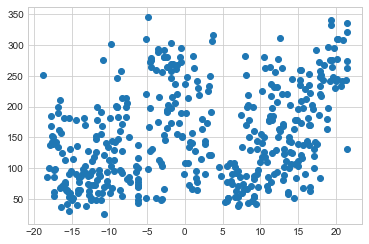

In [30]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

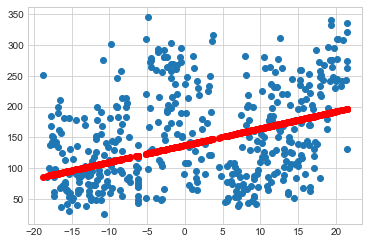

In [31]:
model.fit(X_comp,y)
predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

In [32]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator=estimator,X=X,y=y,cv=5,n_jobs=-1,verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00797772, 0.00598145, 0.0069828 , 0.00698161, 0.00697994]),
 'score_time': array([0.00099683, 0.00199485, 0.00299335, 0.00199342, 0.00199509]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [33]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0,0.1,0.01],
              'model__epsilon':[1.0,0.1,0.01]}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [34]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

### 보스턴 주택 가격

In [35]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
model = SVR(kernel='rbf')
model.fit(X_train,y_train)

SVR()

In [38]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.6694405748929632
평가 데이터 점수: 0.7078065173476904


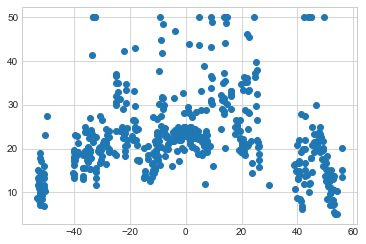

In [39]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

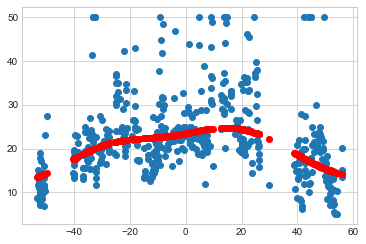

In [40]:
model.fit(X_comp,y)
predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

In [41]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(estimator=estimator,X=X,y=y,cv=5,n_jobs=-1,verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


{'fit_time': array([0.01296449, 0.01396203, 0.02393532, 0.01296473, 0.0149591 ]),
 'score_time': array([0.00598431, 0.00598526, 0.00698161, 0.00598502, 0.011482  ]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [42]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='rbf'))])

param_grid = [{'model__kernel':['rbf','polynomial','sigmoid']}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=-1,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [43]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [44]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='rbf'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0,0.1,0.01],
              'model__epsilon':[1.0,0.1,0.01]}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [45]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

In [46]:
gs.best_params_

{'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'}

### 당뇨병

In [47]:
X,y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [49]:
model = SVR(kernel='rbf')
model.fit(X_train,y_train)

SVR()

In [50]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.1746124687923164
평가 데이터 점수: 0.16577866803990315


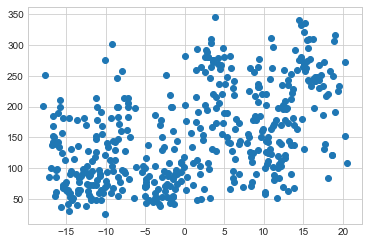

In [51]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

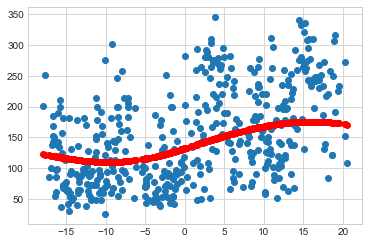

In [52]:
model.fit(X_comp,y)
predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

In [53]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(estimator=estimator,X=X,y=y,cv=5,n_jobs=-1,verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.02493548, 0.00897574, 0.00897574, 0.00897574, 0.00897455]),
 'score_time': array([0.00498486, 0.00398898, 0.00398898, 0.00498676, 0.00399113]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [54]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='rbf'))])

param_grid = [{'model__kernel':['rbf','polynomial','sigmoid']}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=-1,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [56]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [55]:
gs.best_params_

{'model__kernel': 'sigmoid'}

In [57]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0,0.1,0.01],
              'model__epsilon':[1.0,0.1,0.01]}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [58]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [59]:
gs.best_params_

{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'auto'}

In [60]:
model = gs.best_estimator_
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [61]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.3709597960407084
평가 데이터 점수: 0.3803099629746619


## Linear SVC

### 유방암

In [62]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [64]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [65]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9912087912087912
평가 데이터 점수: 0.9385964912280702


In [66]:
def make_meshgrid(x,y,h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx,yy

In [67]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy,Z,**params)
    
    return out

In [68]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0,X1)

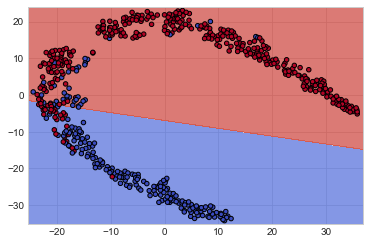

In [69]:
model.fit(X_comp,y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm,alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k')

In [70]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator,X=X,y=y,cv=5,n_jobs=-1,verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.5s finished


{'fit_time': array([0.1884532 , 0.29394007, 0.17647243, 0.19095445, 0.18695807]),
 'score_time': array([0.00150251, 0.0009973 , 0.00350022, 0.00398946, 0.00202441]),
 'test_score': array([0.60344367, 0.66391728, 0.74997599, 0.78640276, 0.70282083])}

In [71]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0,0.1,0.01]}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [72]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [73]:
gs.best_params_

{'model__C': 0.1, 'model__gamma': 'scale'}

### 붓꽃

In [74]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [76]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [77]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9666666666666667


In [80]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0,X1)

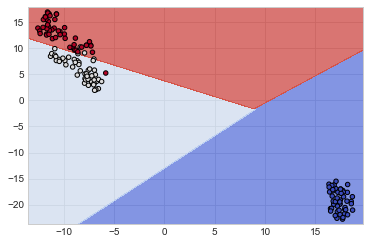

In [81]:
model.fit(X_comp,y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm,alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k')

In [82]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator,X=X,y=y,cv=5,n_jobs=-1,verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00199533, 0.00099707, 0.00199533, 0.00299239, 0.00099778]),
 'score_time': array([0.        , 0.00099659, 0.        , 0.00099683, 0.0010004 ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [83]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0,0.1,0.01]}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [84]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [85]:
gs.best_params_

{'model__C': 1.0, 'model__gamma': 'scale'}

### 와인

In [86]:
X,y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [88]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [89]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9444444444444444


In [90]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0,X1)

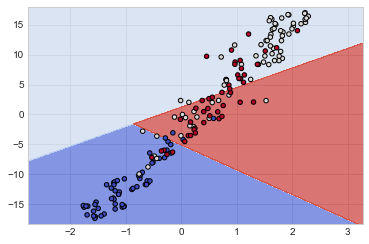

In [91]:
model.fit(X_comp,y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm,alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k')

In [92]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator,X=X,y=y,cv=5,n_jobs=-1,verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00199437, 0.01994896, 0.00199413, 0.00299263, 0.00199533]),
 'score_time': array([0.       , 0.0010004, 0.       , 0.       , 0.       ]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [93]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0,0.1,0.01]}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [94]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [95]:
gs.best_params_

{'model__C': 0.1, 'model__gamma': 'scale'}

## Kernel SVC

### 유방암

In [96]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [97]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [98]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

In [99]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9868131868131869
평가 데이터 점수: 0.9649122807017544


In [ ]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
#xx, yy = make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)

#plot_contours(model, xx, yy, cmap=plt.cm.coolwarm,alpha=0.7)
#plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k')

In [ ]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(estimator=estimator,X=X,y=y,cv=5,n_jobs=-1,verbose=True)

In [ ]:
pipe = Pipeline([('scaler',StandardScaler()),('model',SVC(kernel='rbf'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0,0.1,0.01]}]
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)
gs.fit(X,y)

In [ ]:
gs.best_estimator_

In [73]:
gs.best_params_

{'model__C': 0.1, 'model__gamma': 'scale'}

### 붓꽃

### 와인